In [78]:































%reload_ext autoreload
%autoreload 2

In [1]:
python --version

NameError: name 'python' is not defined

In [79]:
import os
from collections import defaultdict

from string import punctuation

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt

#Using different Classifiers for training
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix


In [80]:
training_path = "./data/1429_1.csv"

In [81]:
df = pd.read_csv(training_path)

/share/apps/rc/software/Anaconda3/2021.11/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:
df = df[['name', 'categories', 'reviews.doRecommend', 'reviews.rating', 'reviews.text', 'reviews.title']]

In [83]:
df = df.rename(columns={'name': 'name', 'categories': 'categories', 'reviews.doRecommend': 'recommend', 'reviews.rating': 'rating', 'reviews.text': 'review', 'reviews.title': 'title'})

In [84]:
# drop rows with no rating
df = df.dropna()

In [85]:
df.shape

(27407, 6)

In [86]:
def get_target(row):
    if int(row['rating']) < 3:
        return 0
    elif row['rating'] > 3:
        return 1
    else:
        return -1
#         return 2

In [87]:
# assign sentiment based on rating
df['sentiment'] = df.apply(lambda row: get_target(row), axis=1)

In [88]:
df.head()

,name,categories,recommend,rating,review,title,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,This product so far has not disappointed. My c...,Kindle,1
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,great for beginner or experienced person. Boug...,very fast,1
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,1
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,1
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,1


In [89]:
df.shape

(27407, 7)

In [90]:
def filter_df(row) -> bool:
  if row.sentiment == 1 and not bool(row.recommend):
    return False
  elif row.sentiment == 0 and bool(row.recommend):
    return False
  
  return True

In [91]:
df = pd.DataFrame(list(filter(filter_df, df.itertuples())))

In [92]:
df

,Index,name,categories,recommend,rating,review,title,sentiment
0,0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,This product so far has not disappointed. My c...,Kindle,1
1,1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,great for beginner or experienced person. Boug...,very fast,1
2,2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,1
3,3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,1
4,4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,1
...,...,...,...,...,...,...,...,...
27177,27895,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",True,5.0,This is my new favorite device. While not perf...,My new favorite product,1
27178,27896,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",True,5.0,I got this to basically experiment with. Strai...,Lots of potential!!!,1
27179,27897,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",True,4.0,Good product that does the basics. Too bad you...,Good First Generation Product,1
27180,27898,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,"Stereos,Remote Controls,Amazon Echo,Audio Dock...",False,3.0,This is great for a connected home. People who...,"Great for a ""connected home""",-1


In [93]:
df.shape

(27182, 8)

In [94]:
import re
import string

# convert text string into clean tokens
def clean_text(text: str) -> list:
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()

    tokens = text.split()
    
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and", "or", "what", "which", "how", "when", "where",
                 "has", "had", "have", "was", "were"]
    
    cleaned_tokens = []
    for token in tokens:
        cleaned_token = token
        
        if not cleaned_token.isalpha():
            continue
        
        if len(cleaned_token) <= 1:
            continue
        
        if cleaned_token not in stop_words:
            cleaned_tokens.append(cleaned_token)
    
    cleaned_tokens = " ".join(cleaned_tokens)
        
    return cleaned_tokens

In [95]:
df.sentiment.value_counts()

 1    25365
-1     1265
 0      552
Name: sentiment, dtype: int64

In [96]:
df["review"] = df["review"].apply(clean_text)

In [97]:
df.head()

,Index,name,categories,recommend,rating,review,title,sentiment
0,0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,product so far not disappointed my children lo...,Kindle,1
1,1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,great for beginner experienced person bought a...,very fast,1
2,2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,inexpensive tablet for him use learn on step u...,Beginner tablet for our 9 year old son.,1
3,3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,4.0,ve my fire hd two weeks now love tablet great ...,Good!!!,1
4,4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,5.0,bought for my grand daughter she comes over vi...,Fantastic Tablet for kids,1


In [98]:
Y = df['sentiment']
X = df['review']

In [99]:
Y.value_counts()

 1    25365
-1     1265
 0      552
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Most frequently occuring top 30 words')

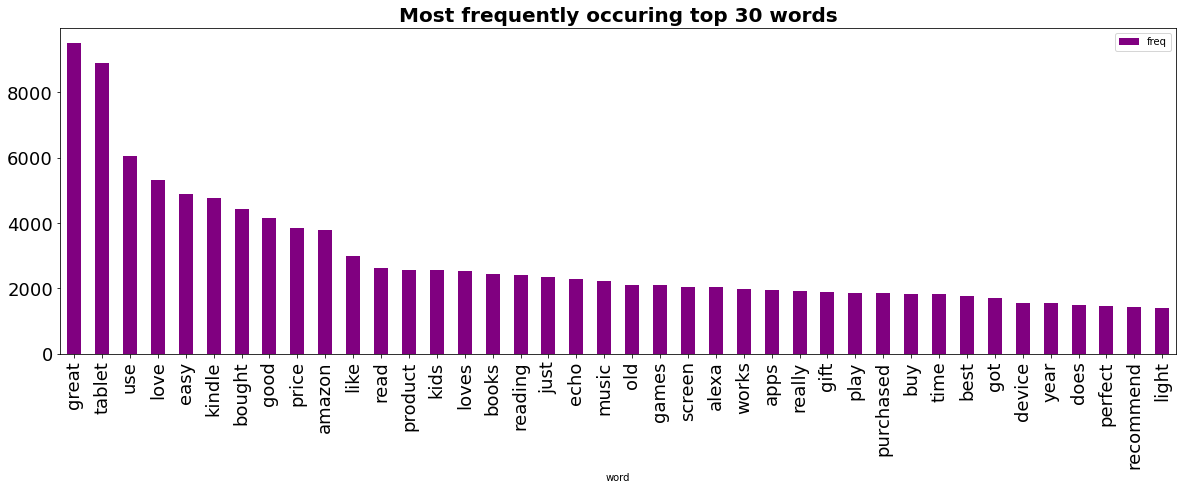

In [100]:
#top 40 most frequesntly occuring items
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

cv = CountVectorizer(stop_words = 'english')
words_cv = cv.fit_transform(df.review)
combine_words = words_cv.sum(axis=0)
words = [(word, combine_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(40).plot(x='word', y='freq', kind='bar', figsize=(20, 6), color = 'purple',fontsize=18)
plt.title("Most frequently occuring top 30 words",weight='bold',fontsize=20)

Text(0.5, 1.0, 'Ratings count')

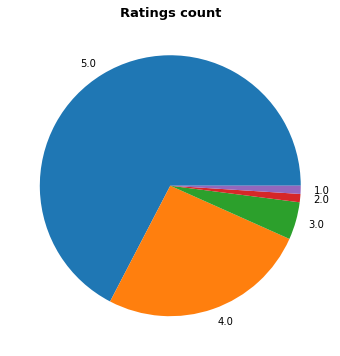

In [101]:
#df.categories.value_counts().plot(kind='density',label="",figsize=(18,6))
df.rating.value_counts().plot(kind='pie',label="",figsize=(18,6))
plt.title("Ratings count",weight='bold',fontsize=13)

In [102]:
# df = df_combo

In [182]:
tv = TfidfVectorizer(stop_words=None, max_features=1000)

X_vec = tv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, Y, test_size=0.2, random_state=1)

In [183]:
X_train.shape, X_test.shape

((21745, 1000), (5437, 1000))

# Without Oversampling

# Naive-Bayes Classifier

In [105]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average='macro'),
           'recall' : make_scorer(recall_score, average='macro'), 
           'f1_score' : make_scorer(f1_score, average='macro')}

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

In [106]:

model = MultinomialNB()
results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['f1_score'])

print(f"f1 score: {results.mean()}")

results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['accuracy'])

print(f"accuracy: {results.mean()}")

f1 score: 0.32958218466554406
accuracy: 0.9333748340040826


In [107]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_classes = nb.predict(X_test)

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       270
           0       0.00      0.00      0.00       103
           1       0.93      1.00      0.96      5064

    accuracy                           0.93      5437
   macro avg       0.31      0.33      0.32      5437
weighted avg       0.87      0.93      0.90      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saugat/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/saugat/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


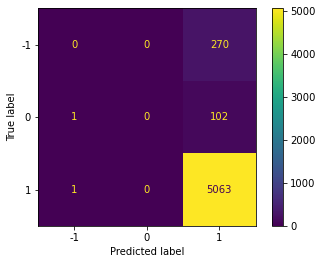

In [108]:
plot = plot_confusion_matrix(nb, X_test, y_test)
plot.figure_.savefig('./Plots/nb_orig.jpeg', dpi=200)

# Logistic Regression Classifier

In [109]:
model = LogisticRegression()
results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['f1_score'])

print(f"f1 score: {results.mean()}")

results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['accuracy'])

print(f"accuracy: {results.mean()}")

/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

f1 score: 0.4815298700698298


/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

accuracy: 0.9372376845034301


/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_classes = lr.predict(X_test)

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.40      0.07      0.12       270
           0       0.68      0.26      0.38       103
           1       0.94      0.99      0.97      5064

    accuracy                           0.94      5437
   macro avg       0.67      0.44      0.49      5437
weighted avg       0.91      0.94      0.91      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


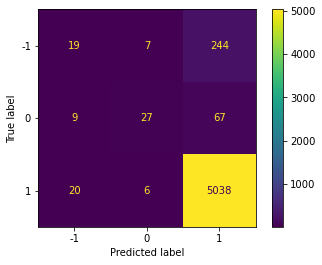

In [111]:
plot = plot_confusion_matrix(lr, X_test, y_test)
plot.figure_.savefig('./Plots/lr_orig.jpeg', dpi=200)

# Stochastic Gradient Descent Classifier

In [112]:
model = SGDClassifier()
results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['f1_score'])

print(f"f1 score: {results.mean()}")

results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['accuracy'])

print(f"accuracy: {results.mean()}")

f1 score: 0.34296046115895856
accuracy: 0.9338530998037683


In [113]:
# sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=0, max_iter=15, tol=None)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

y_pred_classes = sgd.predict(X_test)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       1.00      0.00      0.01       270
           0       0.88      0.07      0.13       103
           1       0.93      1.00      0.97      5064

    accuracy                           0.93      5437
   macro avg       0.94      0.36      0.37      5437
weighted avg       0.94      0.93      0.90      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


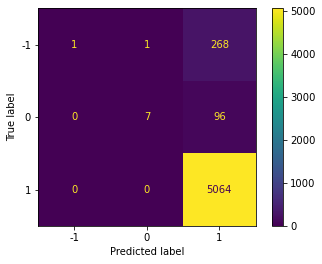

In [114]:
plot = plot_confusion_matrix(sgd, X_test, y_test)
plot.figure_.savefig('./Plots/sgd_orig.jpeg', dpi=200)

# Decision Tree Classifier

In [115]:
model = DecisionTreeClassifier()
results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['f1_score'])

print(f"f1 score: {results.mean()}")

results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['accuracy'])

print(f"accuracy: {results.mean()}")

f1 score: 0.4303102776545309
accuracy: 0.8983884695521471


In [116]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_classes = dt.predict(X_test)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.15      0.12      0.13       270
           0       0.21      0.19      0.20       103
           1       0.94      0.96      0.95      5064

    accuracy                           0.90      5437
   macro avg       0.43      0.42      0.43      5437
weighted avg       0.89      0.90      0.90      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


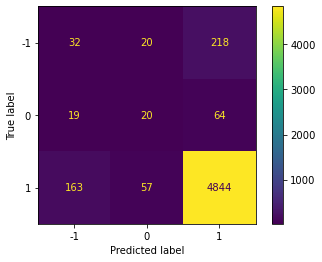

In [117]:
plot = plot_confusion_matrix(dt, X_test, y_test)
plot.figure_.savefig('./Plots/dt_orig.jpeg', dpi=200)

# k-NN Classifier

In [118]:
model = KNeighborsClassifier()
results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['f1_score'])

print(f"f1 score: {results.mean()}")

results = model_selection.cross_val_score(model, X_vec, Y, cv=kfold, scoring=scoring['accuracy'])

print(f"accuracy: {results.mean()}")

f1 score: 0.32845609843693296
accuracy: 0.9327126770679499


In [119]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_classes = knn.predict(X_test)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.40      0.01      0.01       270
           0       0.00      0.00      0.00       103
           1       0.93      1.00      0.96      5064

    accuracy                           0.93      5437
   macro avg       0.44      0.34      0.33      5437
weighted avg       0.89      0.93      0.90      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


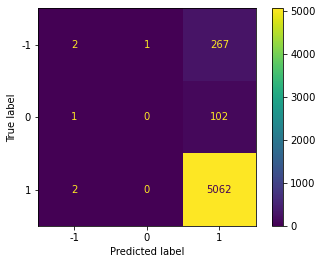

In [120]:
plot = plot_confusion_matrix(knn, X_test, y_test)
plot.figure_.savefig('./Plots/knn_orig.jpeg', dpi=200)

# Oversampling the minority classes

In [184]:
# # solve class imbalance issue with SMOTE oversampling method
# tv = TfidfVectorizer(stop_words=None, max_features=1000)
# X_tfidf = tv.fit_transform(X)

smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, y_train)

In [185]:
X_train, y_train = X_SMOTE, y_SMOTE

# Naive-Bayes Classifier

In [124]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_classes = nb.predict(X_test)

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.16      0.55      0.24       270
           0       0.17      0.67      0.26       103
           1       0.98      0.79      0.88      5064

    accuracy                           0.78      5437
   macro avg       0.43      0.67      0.46      5437
weighted avg       0.93      0.78      0.83      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


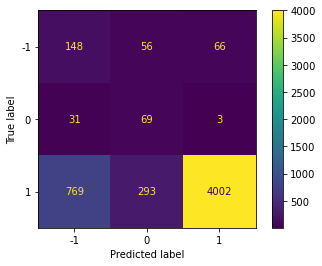

In [125]:
plot = plot_confusion_matrix(nb, X_test, y_test)
plot.figure_.savefig('./Plots/nb_over.jpeg', dpi=200)

# Logistic Regression Classifier

In [126]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_classes = lr.predict(X_test)

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.16      0.47      0.24       270
           0       0.18      0.54      0.27       103
           1       0.98      0.84      0.90      5064

    accuracy                           0.81      5437
   macro avg       0.44      0.62      0.47      5437
weighted avg       0.92      0.81      0.86      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


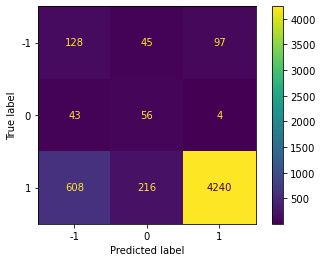

In [127]:
plot = plot_confusion_matrix(lr, X_test, y_test)
plot.figure_.savefig('./Plots/lr_over.jpeg', dpi=200)

# Stochastic Gradient Descent Classifier

In [37]:
model = SGDClassifier()
results = model_selection.cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring=scoring['f1_score'])

print(f"f1 score: {results.mean()}")

results = model_selection.cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring=scoring['accuracy'])

print(f"accuracy: {results.mean()}")

f1 score: 0.8569757612085628
accuracy: 0.8569551134981068


In [128]:
# sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=0, max_iter=15, tol=None)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

y_pred_classes = sgd.predict(X_test)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.17      0.53      0.25       270
           0       0.16      0.52      0.24       103
           1       0.98      0.82      0.89      5064

    accuracy                           0.80      5437
   macro avg       0.43      0.62      0.46      5437
weighted avg       0.92      0.80      0.85      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


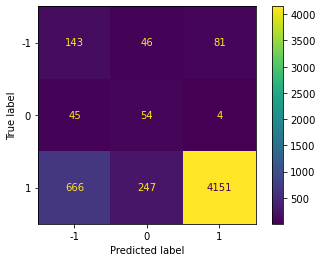

In [129]:
plot = plot_confusion_matrix(sgd, X_test, y_test)
plot.figure_.savefig('./Plots/sgd_over.jpeg', dpi=200)

# Decision Tree Classifier

In [130]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_classes = dt.predict(X_test)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.12      0.19      0.15       270
           0       0.11      0.19      0.14       103
           1       0.95      0.90      0.92      5064

    accuracy                           0.85      5437
   macro avg       0.39      0.43      0.40      5437
weighted avg       0.89      0.85      0.87      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


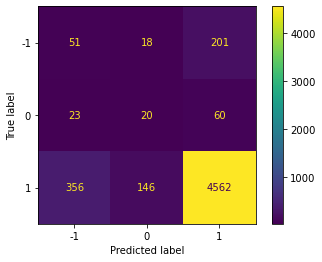

In [131]:
plot = plot_confusion_matrix(dt, X_test, y_test)
plot.figure_.savefig('./Plots/dt_over.jpeg', dpi=200)

# k-NN Classifier

In [39]:
model = KNeighborsClassifier()
results = model_selection.cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring=scoring['f1_score'])

print(f"f1 score: {results.mean()}")

results = model_selection.cross_val_score(model, X_SMOTE, y_SMOTE, cv=kfold, scoring=scoring['accuracy'])

print(f"accuracy: {results.mean()}")

f1 score: 0.6452363794779805
accuracy: 0.7145016543622091


In [132]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_classes = knn.predict(X_test)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.08      0.11      0.09       270
           0       0.02      0.94      0.04       103
           1       0.99      0.13      0.22      5064

    accuracy                           0.14      5437
   macro avg       0.36      0.39      0.12      5437
weighted avg       0.92      0.14      0.21      5437



/home/saugat/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


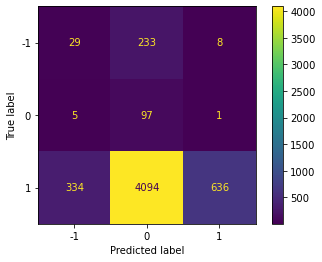

In [133]:
plot = plot_confusion_matrix(knn, X_test, y_test)
plot.figure_.savefig('./Plots/knn_over.jpeg', dpi=200)

# Ensemble

In [134]:
import copy

In [135]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average='macro'),
           'recall' : make_scorer(recall_score, average='macro'), 
           'f1_score' : make_scorer(f1_score, average='macro')}

nb = MultinomialNB()
lr = LogisticRegression()
sgd = SGDClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

estimators = []
estimators.append(('nb', nb))
estimators.append(('lr', lr))
estimators.append(('sgd', sgd))
estimators.append(('dt', dt))
estimators.append(('knn', knn))

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# Without oversampling

In [136]:
ensemble = VotingClassifier(estimators)

results = model_selection.cross_val_score(ensemble, X_tfidf, Y, cv=kfold, scoring=scoring['f1_score'])
print(results.mean())

results = model_selection.cross_val_score(ensemble, X_tfidf, Y, cv=kfold, scoring=scoring['accuracy'])
print(results.mean())

/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.3328504104954342


/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9335955710246024


# With oversampling

In [145]:
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)

y_pred_classes = ensemble.predict(X_test)
print(classification_report(y_test, y_pred_classes))

/home/saugat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.17      0.52      0.26       270
           0       0.18      0.65      0.28       103
           1       0.98      0.82      0.89      5064

    accuracy                           0.80      5437
   macro avg       0.44      0.66      0.48      5437
weighted avg       0.93      0.80      0.85      5437



# Bagging

In [137]:
num_trees = 10
model = BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=7)

# without oversampling

In [138]:
      
results = model_selection.cross_val_score(model, X_tfidf, Y, cv=kfold, scoring=scoring['f1_score'])
print(results.mean())
      
results = model_selection.cross_val_score(model, X_tfidf, Y, cv=kfold, scoring=scoring['accuracy'])
print(results.mean())

0.4071839064933789
0.9254283959848676


# with oversampling

In [146]:
ensemble = BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=7)
ensemble.fit(X_train, y_train)

y_pred_classes = ensemble.predict(X_test)
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

          -1       0.14      0.19      0.16       270
           0       0.19      0.26      0.22       103
           1       0.95      0.92      0.94      5064

    accuracy                           0.88      5437
   macro avg       0.43      0.46      0.44      5437
weighted avg       0.89      0.88      0.88      5437



# Boosting

In [142]:
from xgboost import XGBClassifier

# XGBoost

In [143]:
num_trees = 10
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = XGBClassifier()

# without oversampling

In [159]:
def change_label(val):
    if val == -1:
        return 2
    return val

Y_ = Y.apply(lambda x: change_label(x))
y_train_ = y_train.apply(lambda x: change_label(x))
y_test_ = y_test.apply(lambda x: change_label(x))

In [161]:
results = model_selection.cross_val_score(model, X_tfidf, Y_, cv=kfold, scoring=scoring['f1_score'])
print(results.mean())
      
results = model_selection.cross_val_score(model, X_tfidf, Y_, cv=kfold, scoring=scoring['accuracy'])
print(results.mean())

0.4238363576333267
0.9346623967117722


# with oversampling

In [158]:
ensemble = XGBClassifier()
ensemble.fit(X_train, y_train_)

y_pred_classes = ensemble.predict(X_test)
print(classification_report(y_test_, y_pred_classes))

              precision    recall  f1-score   support

           0       0.26      0.35      0.30       103
           1       0.96      0.95      0.96      5064
           2       0.26      0.24      0.25       270

    accuracy                           0.91      5437
   macro avg       0.49      0.51      0.50      5437
weighted avg       0.91      0.91      0.91      5437



# Deep Learning

In [1]:
def change_label(val):
    if val == -1:
        return 2
    return val

y_train_ = y_train.apply(lambda x: change_label(x))
y_test_ = y_test.apply(lambda x: change_label(x))

NameError: name 'y_train' is not defined

In [2]:
import torch
import torch.nn as nn
import torch.utils.data as torchdata

X_train, X_test = X_train.toarray(), X_test.toarray()
y_train, y_test = np.array(y_train_), np.array(y_test_)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

ModuleNotFoundError: No module named 'torch'

In [188]:
class ReviewDataset(torchdata.Dataset):
    def __init__(self, train=True):
        self.X_train = torch.from_numpy(X_train).float()
        self.y_train = torch.from_numpy(y_train)
        self.X_test = torch.from_numpy(X_test).float()
        self.y_test = torch.from_numpy(y_test)
        self.train = train
    
    def __getitem__(self, index):
        if self.train:
            return self.X_train[index], self.y_train[index]
        else:
            return self.X_test[index], self.y_test[index]

    def __len__(self):
        if self.train:
            return self.X_train.shape[0]
        else:
            return self.X_test.shape[0]

train_dataset = ReviewDataset(True)
val_dataset = ReviewDataset(False)

print("Create DataLoader ...")
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
)

model = nn.Sequential(
    nn.Linear(1000, 400),
    nn.ReLU(),
    nn.Linear(400, 100),
    nn.ReLU(),
    nn.Linear(100, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-2)

print("Start Training ...")
losses = []
acces = []
eval_losses = []
eval_acces = []

for e in range(20):
    train_loss = 0
    train_acc = 0
    model.train()
    for data, label in train_dataloader:
        out = model(data)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / data.shape[0]
        train_acc += acc
        
    losses.append(train_loss / len(train_dataloader))
    acces.append(train_acc / len(train_dataloader))
    eval_loss = 0
    eval_acc = 0
    model.eval()
    for data, label in val_dataloader:
        out = model(data)
        loss = criterion(out, label)
        eval_loss += loss.item()
        _, pred = out.max(1)
        num_correct = (pred == label).sum().item()
        acc = num_correct / data.shape[0]
        eval_acc += acc
        
    eval_losses.append(eval_loss / len(val_dataloader))
    eval_acces.append(eval_acc / len(val_dataloader))
    print('epoch: {}, Train Loss: {:.6f}, Train Acc: {:.6f}, Eval Loss: {:.6f}, Eval Acc: {:.6f}'
          .format(e, train_loss / len(train_dataloader), train_acc / len(train_dataloader), 
                     eval_loss / len(val_dataloader), eval_acc / len(val_dataloader)))

Create DataLoader ...
Start Training ...
epoch: 0, Train Loss: 0.146401, Train Acc: 0.946002, Eval Loss: 0.489094, Eval Acc: 0.913730
epoch: 1, Train Loss: 0.016862, Train Acc: 0.995093, Eval Loss: 0.629725, Eval Acc: 0.924962
epoch: 2, Train Loss: 0.009578, Train Acc: 0.997259, Eval Loss: 0.596368, Eval Acc: 0.919631
epoch: 3, Train Loss: 0.008660, Train Acc: 0.997292, Eval Loss: 0.709397, Eval Acc: 0.912443
epoch: 4, Train Loss: 0.006618, Train Acc: 0.998309, Eval Loss: 0.712160, Eval Acc: 0.924391
epoch: 5, Train Loss: 0.004675, Train Acc: 0.998818, Eval Loss: 0.875939, Eval Acc: 0.924391
epoch: 6, Train Loss: 0.006175, Train Acc: 0.998556, Eval Loss: 1.079212, Eval Acc: 0.927149
epoch: 7, Train Loss: 0.004440, Train Acc: 0.998933, Eval Loss: 0.871989, Eval Acc: 0.922186
epoch: 8, Train Loss: 0.004354, Train Acc: 0.998982, Eval Loss: 1.056524, Eval Acc: 0.916893
epoch: 9, Train Loss: 0.003537, Train Acc: 0.999196, Eval Loss: 0.907633, Eval Acc: 0.920715
epoch: 10, Train Loss: 0.0030

In [189]:
pred_label = []
for data, label in val_dataloader:
    out = model(data)
    _, pred = out.max(1)
    pred = pred.numpy()
    for el in pred:
        pred_label.append(el)

pred_label = np.array(pred_label)

print(classification_report(y_test, pred_label))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44       103
           1       0.95      0.99      0.97      5064
           2       0.26      0.07      0.11       270

    accuracy                           0.93      5437
   macro avg       0.58      0.48      0.51      5437
weighted avg       0.90      0.93      0.91      5437



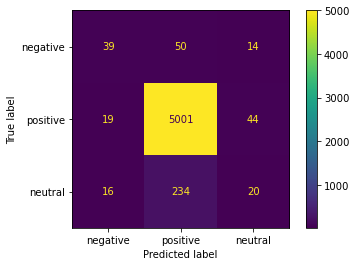

In [190]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_label)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive', 'neutral'])
disp.plot()
plt.savefig('./cm2.png', dpi=300)
plt.show()

In [192]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_label, average='weighted')

0.9142227988288938